# Описание

В общей системе экспериментальной установки нам необходимо подготовить модель сети связи на которую будут наложены сетевые задержки в рамках LWMECPS используя Litmus Chaos. 

Алгоритм HCPP на базе стохастической геометрии позволяет при определенном приближении расчитать сеть связи в двухмерном пространстве.

In [ ]:
# import numpy as np
# import networkx as nx
# import matplotlib.pyplot as plt
# from scipy.spatial import Voronoi, voronoi_plot_2d
# from scipy.spatial.distance import pdist, squareform
# from collections import defaultdict
# import json

# # TODO:
# # ноды = базовые станции = вышки сотовой связи
# # 1. Взять распределение пользователей по вышкам из генератора экспериментов
# # 2. Добавить/включить расчет задержек между нодами
# # 3. Проверить работу HCPP
# class AdvancedHCPPNetwork:
#     def __init__(self, area_size=100, num_base_stations=50,
#                  min_distance=10, num_users=200):
#         """
#         Расширенная модель HCPP сети

#         Args:
#         - area_size: размер территории
#         - num_base_stations: число базовых станций
#         - min_distance: минимальное расстояние между станциями
#         - num_users: число пользователей
#         """
#         self.area_size = area_size
#         self.num_base_stations = num_base_stations
#         self.min_distance = min_distance
#         self.num_users = num_users

#         self.base_stations = None
#         self.users = None
#         self.connectivity_matrix = None
#         self.graph = None

#     def generate_base_stations(self):
#         """Генерация базовых станций с HCPP"""
#         points = []
#         attempts = 0
#         max_attempts = 1000

#         while len(points) < self.num_base_stations and attempts < max_attempts:
#             new_point = np.random.uniform(0, self.area_size, 2)

#             if not points or all(np.linalg.norm(new_point - p) >= self.min_distance for p in points):
#                 points.append(new_point)

#             attempts += 1

#         self.base_stations = np.array(points)
#         return self.base_stations

#     def generate_users(self, distribution='uniform'):
#         """
#         Генерация пользователей с различными распределениями

#         Args:
#         - distribution: 'uniform', 'normal', 'clustered'
#         """
#         if distribution == 'uniform':
#             self.users = np.random.uniform(0, self.area_size, (self.num_users, 2))
#         elif distribution == 'normal':
#             # Генерация с центрами в случайных точках базовых станций
#             center = self.base_stations[np.random.randint(len(self.base_stations))]
#             self.users = np.random.normal(center, scale=10, size=(self.num_users, 2))
#         elif distribution == 'clustered':
#             # Кластеризованное распределение
#             clusters = self.base_stations
#             self.users = np.concatenate([
#                 np.random.normal(cluster, scale=5, size=(self.num_users//len(clusters), 2))
#                 for cluster in clusters
#             ])

#         return self.users

#     def calculate_voronoi_coverage(self):
#         """Расчет зон покрытия методом диаграмм Вороного"""
#         vor = Voronoi(self.base_stations)

#         plt.figure(figsize=(12, 10))
#         voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=10)
#         plt.scatter(self.base_stations[:, 0], self.base_stations[:, 1], c='red', marker='x')
#         plt.scatter(self.users[:, 0], self.users[:, 1], c='blue', alpha=0.5, s=10)
#         plt.title('Покрытие базовых станций (Диаграмма Вороного)')
#         plt.xlabel('X координата')
#         plt.ylabel('Y координата')
#         plt.show()

#     def build_network_graph(self, max_connection_distance=20):
#         """
#         Построение графа связности базовых станций

#         Args:
#         - max_connection_distance: максимальное расстояние для соединения
#         """
#         # Матрица физических расстояний
#         distances = squareform(pdist(self.base_stations))

#         # Создание графа
#         G = nx.Graph()
#         G.add_nodes_from(range(len(self.base_stations)))

#         # Добавление ребер
#         for i in range(len(self.base_stations)):
#             for j in range(i+1, len(self.base_stations)):
#                 if distances[i, j] <= max_connection_distance:
#                     G.add_edge(i, j, weight=distances[i, j])

#         self.graph = G
#         self.connectivity_matrix = nx.adjacency_matrix(G).toarray()

#         return self.graph, self.connectivity_matrix

#     def visualize_network_graph(self):
#         """Визуализация графа связности"""
#         plt.figure(figsize=(12, 10))
#         pos = {i: self.base_stations[i] for i in range(len(self.base_stations))}
#         nx.draw(self.graph, pos, with_labels=True,
#                 node_color='red', node_size=100,
#                 font_size=8, font_color='blue')
#         plt.title('Граф связности базовых станций')
#         plt.show()

# # Пример использования
# # np.random.seed(42)
# # network = AdvancedHCPPNetwork(
# #     area_size=10,
# #     num_base_stations=4,
# #     min_distance=1,
# #     num_users=100
# # )

# # # Генерация базовых станций и пользователей
# # base_stations = network.generate_base_stations()
# # users = network.generate_users(distribution='clustered')

# # # Визуализация покрытия
# # network.calculate_voronoi_coverage()

# # # Построение графа связности
# # graph, connectivity_matrix = network.build_network_graph(max_connection_distance=25)

# # # Визуализация графа
# # network.visualize_network_graph()

# # # Вывод матрицы связности
# # print("Матрица связности базовых станций:")
# # print(connectivity_matrix)

In [ ]:
# class LoadProfileUserDistribution:
#     def __init__(self, load_profile_path, num_base_stations):
#         """
#         Инициализация распределения пользователей на основе профиля нагрузки
        
#         Args:
#         - load_profile_path: путь к JSON файлу с профилем нагрузки
#         - num_base_stations: количество базовых станций
#         """
#         self.load_profile_path = load_profile_path
#         self.num_base_stations = num_base_stations
#         self.load_profile = None
#         self.load_profile_data()
        
#     def load_profile_data(self):
#         """Загрузка данных профиля нагрузки"""
#         with open(self.load_profile_path, 'r') as f:
#             self.load_profile = json.load(f)
            
#     def get_ue_count_at_time(self, time_index):
#         """Получение количества UE в определенный момент времени"""
#         if time_index < len(self.load_profile):
#             return self.load_profile[time_index]['ue_count']
#         return None
    
#     def distribute_users(self, time_index, base_stations):
#         """
#         Распределение пользователей по базовым станциям на основе профиля нагрузки
        
#         Args:
#         - time_index: индекс времени в профиле нагрузки
#         - base_stations: координаты базовых станций
        
#         Returns:
#         - Словарь с распределением пользователей по станциям
#         """
#         ue_count = self.get_ue_count_at_time(time_index)
#         if ue_count is None:
#             return None
            
#         # Создаем словарь для хранения распределения
#         distribution = defaultdict(list)
        
#         # Генерируем случайные координаты для пользователей
#         users = np.random.uniform(0, 100, (ue_count, 2))
        
#         # Для каждого пользователя находим ближайшую базовую станцию
#         for user_idx, user_pos in enumerate(users):
#             # Вычисляем расстояния до всех базовых станций
#             distances = np.linalg.norm(base_stations - user_pos, axis=1)
#             # Находим индекс ближайшей станции
#             nearest_station = np.argmin(distances)
#             # Добавляем пользователя к ближайшей станции
#             distribution[nearest_station].append(user_pos)
            
#         return distribution
    
#     def visualize_distribution(self, time_index, base_stations, distribution):
#         """Визуализация распределения пользователей"""
#         plt.figure(figsize=(12, 10))
        
#         # Отображаем базовые станции
#         plt.scatter(base_stations[:, 0], base_stations[:, 1], 
#                    c='red', marker='x', s=100, label='Base Stations')
        
#         # Отображаем пользователей для каждой станции
#         for station_idx, users in distribution.items():
#             if users:
#                 users = np.array(users)
#                 plt.scatter(users[:, 0], users[:, 1], 
#                           alpha=0.5, s=10, 
#                           label=f'Users on Station {station_idx}')
        
#         plt.title(f'User Distribution at Time Index {time_index}')
#         plt.xlabel('X coordinate')
#         plt.ylabel('Y coordinate')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

# # Пример использования
# if __name__ == "__main__":
#     # Создаем экземпляр класса
#     load_dist = LoadProfileUserDistribution(
#         load_profile_path='../test_env/load_profile_with_deviation.json',
#         num_base_stations=4
#     )
    
#     # Создаем сеть
#     network = AdvancedHCPPNetwork(
#         area_size=100,
#         num_base_stations=4,
#         min_distance=20,
#         num_users=100
#     )
    
#     # Генерируем базовые станции
#     base_stations = network.generate_base_stations()
    
#     # Получаем распределение пользователей для определенного момента времени
#     time_index = 0  # Можно выбрать любой момент времени
#     distribution = load_dist.distribute_users(time_index, base_stations)
    
#     # Визуализируем распределение
#     if distribution:
#         load_dist.visualize_distribution(time_index, base_stations, distribution)
        
#         # Выводим статистику распределения
#         print(f"\nDistribution Statistics at Time Index {time_index}:")
#         for station_idx, users in distribution.items():
#             print(f"Station {station_idx}: {len(users)} users")

<Figure size 1200x1000 with 0 Axes>

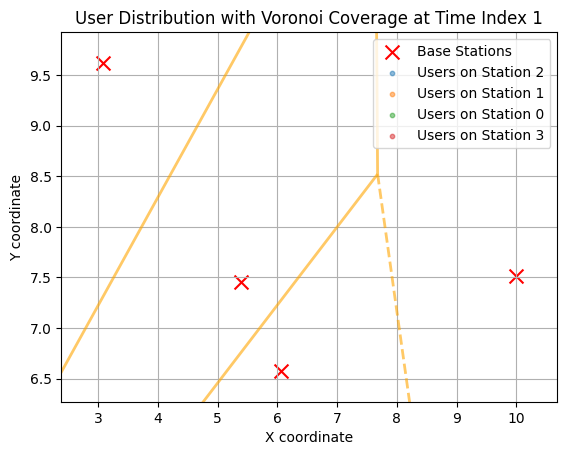


Distribution Statistics at Time Index 1 (Timestamp: 10):
Station 2: 76 users
Station 1: 15 users
Station 0: 2 users
Station 3: 1 users

Coverage Statistics:
Station 2:
  Total users: 76
  Users in Voronoi cell: 0
  Coverage percentage: 0.00%
Station 1:
  Total users: 15
  Users in Voronoi cell: 0
  Coverage percentage: 0.00%
Station 0:
  Total users: 2
  Users in Voronoi cell: 0
  Coverage percentage: 0.00%
Station 3:
  Total users: 1
  Users in Voronoi cell: 1
  Coverage percentage: 100.00%


In [84]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial.distance import pdist, squareform
import json
from collections import defaultdict
import os
from datetime import datetime

class AdvancedHCPPNetwork:
    def __init__(self, area_size=100, num_base_stations=50,
                 min_distance=10, num_users=200):
        """
        Расширенная модель HCPP сети

        Args:
        - area_size: размер территории
        - num_base_stations: число базовых станций
        - min_distance: минимальное расстояние между станциями
        - num_users: число пользователей
        """
        if min_distance > area_size / 2:
            raise ValueError("min_distance is too large for the given area_size")

        self.area_size = area_size
        self.num_base_stations = num_base_stations
        self.min_distance = min_distance
        self.num_users = num_users

        self.base_stations = None
        self.users = None
        self.connectivity_matrix = None
        self.graph = None

    def generate_base_stations(self, fixed_seed=None):
        """Генерация базовых станций с HCPP"""
        if fixed_seed is not None:
            np.random.seed(fixed_seed)
            
        points = []
        attempts = 0
        max_attempts = 1000

        while len(points) < self.num_base_stations and attempts < max_attempts:
            new_point = np.random.uniform(0, self.area_size, 2)

            if not points or all(np.linalg.norm(new_point - p) >= self.min_distance for p in points):
                points.append(new_point)

            attempts += 1

        self.base_stations = np.array(points)
        return self.base_stations

    def generate_users(self, distribution='uniform', fixed_seed=None):
        """
        Генерация пользователей с различными распределениями

        Args:
        - distribution: 'uniform', 'normal', 'clustered'
        - fixed_seed: фиксированное значение для генератора случайных чисел
        """
        if fixed_seed is not None:
            np.random.seed(fixed_seed)
            
        if distribution == 'uniform':
            self.users = np.random.uniform(0, self.area_size, (self.num_users, 2))
        elif distribution == 'normal':
            center = self.base_stations[np.random.randint(len(self.base_stations))]
            self.users = np.random.normal(center, scale=10, size=(self.num_users, 2))
        elif distribution == 'clustered':
            clusters = self.base_stations
            self.users = np.concatenate([
                np.random.normal(cluster, scale=5, size=(self.num_users//len(clusters), 2))
                for cluster in clusters
            ])

        return self.users

class LoadProfileUserDistribution:
    def __init__(self, load_profile_path, num_base_stations):
        """
        Инициализация распределения пользователей на основе профиля нагрузки
        
        Args:
        - load_profile_path: путь к JSON файлу с профилем нагрузки
        - num_base_stations: количество базовых станций
        """
        self.load_profile_path = load_profile_path
        self.num_base_stations = num_base_stations
        self.load_profile = None
        self.load_profile_data()
        
    def load_profile_data(self):
        """Загрузка данных профиля нагрузки"""
        with open(self.load_profile_path, 'r') as f:
            self.load_profile = json.load(f)
            
    def get_ue_count_at_time(self, time_index):
        """Получение количества UE в определенный момент времени"""
        if time_index < len(self.load_profile):
            return {
                'ue_count': self.load_profile[time_index]['ue_count'],
                'timestamp': self.load_profile[time_index]['timestamp']
            }
        return None
    
    def distribute_users(self, time_index, base_stations, fixed_seed=None):
        """
        Распределение пользователей по базовым станциям на основе профиля нагрузки
        
        Args:
        - time_index: индекс времени в профиле нагрузки
        - base_stations: координаты базовых станций
        - fixed_seed: фиксированное значение для генератора случайных чисел
        
        Returns:
        - Словарь с распределением пользователей по станциям
        """
        time_data = self.get_ue_count_at_time(time_index)
        if time_data is None:
            return None
            
        ue_count = time_data['ue_count']
        timestamp = time_data['timestamp']
            
        # Создаем словарь для хранения распределения
        distribution = defaultdict(list)
        
        # Устанавливаем seed для воспроизводимости
        if fixed_seed is not None:
            np.random.seed(fixed_seed + time_index)
        
        # Генерируем случайные координаты для пользователей
        users = np.random.uniform(0, 100, (ue_count, 2))
        
        # Для каждого пользователя находим ближайшую базовую станцию
        for user_idx, user_pos in enumerate(users):
            # Вычисляем расстояния до всех базовых станций
            distances = np.linalg.norm(base_stations - user_pos, axis=1)
            # Находим индекс ближайшей станции
            nearest_station = np.argmin(distances)
            # Добавляем пользователя к ближайшей станции
            distribution[nearest_station].append(user_pos.tolist())
            
        return distribution, timestamp
    
    def visualize_distribution(self, time_index, base_stations, distribution):
        """Визуализация распределения пользователей"""
        plt.figure(figsize=(12, 10))
        
        # Создаем диаграмму Вороного
        vor = Voronoi(base_stations)
        voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', 
                       line_width=2, line_alpha=0.6, point_size=0)
        
        # Отображаем базовые станции
        plt.scatter(base_stations[:, 0], base_stations[:, 1], 
                   c='red', marker='x', s=100, label='Base Stations')
        
        # Отображаем пользователей для каждой станции
        for station_idx, users in distribution.items():
            if users:
                users = np.array(users)
                plt.scatter(users[:, 0], users[:, 1], 
                          alpha=0.5, s=10, 
                          label=f'Users on Station {station_idx}')
        
        plt.title(f'User Distribution with Voronoi Coverage at Time Index {time_index}')
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def calculate_coverage_statistics(self, base_stations, distribution):
        """
        Расчет статистики покрытия на основе диаграммы Вороного
        
        Args:
        - base_stations: координаты базовых станций
        - distribution: распределение пользователей
        
        Returns:
        - Словарь со статистикой покрытия для каждой станции
        """
        vor = Voronoi(base_stations)
        coverage_stats = {}
        
        for station_idx, users in distribution.items():
            if users:
                users = np.array(users)
                # Находим ячейку Вороного для текущей станции
                region_idx = vor.point_region[station_idx]
                region = vor.regions[region_idx]
                
                # Проверяем, находятся ли пользователи внутри ячейки
                inside_cell = []
                for user in users:
                    if self._point_in_polygon(user, vor.vertices[region]):
                        inside_cell.append(user)
                
                coverage_stats[station_idx] = {
                    'total_users': len(users),
                    'users_in_cell': len(inside_cell),
                    'coverage_percentage': (len(inside_cell) / len(users)) * 100 if len(users) > 0 else 0
                }
        
        return coverage_stats
    
    def _point_in_polygon(self, point, polygon):
        """
        Проверка, находится ли точка внутри многоугольника
        
        Args:
        - point: координаты точки (x, y)
        - polygon: массив вершин многоугольника
        
        Returns:
        - True, если точка внутри многоугольника, иначе False
        """
        x, y = point
        n = len(polygon)
        inside = False
        
        p1x, p1y = polygon[0]
        for i in range(1, n + 1):
            p2x, p2y = polygon[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y
            
        return inside


# # Пример использования
# if __name__ == "__main__":
#     # Создаем экземпляр класса
#     load_dist = LoadProfileUserDistribution(
#         load_profile_path='../test_env/load_profile_with_deviation.json',
#         num_base_stations=4
#     )
    
#     # Создаем сеть
#     network = AdvancedHCPPNetwork(
#         area_size=10,
#         num_base_stations=4,
#         min_distance=1,
#         num_users=100
#     )
    
#     # Генерируем базовые станции
#     base_stations = network.generate_base_stations(fixed_seed=93)
    
#     # Анализируем распределение пользователей в разные моменты времени
#     time_indices = [1]  # Примеры моментов времени
    
#     for time_index in time_indices:
#         # Получаем распределение пользователей для текущего момента времени
#         distribution, timestamp = load_dist.distribute_users(time_index, base_stations)
        
#         # Визуализируем распределение
#         if distribution:
#             load_dist.visualize_distribution(time_index, base_stations, distribution)
            
#             # Выводим статистику распределения
#             print(f"\nDistribution Statistics at Time Index {time_index} (Timestamp: {timestamp}):")
#             for station_idx, users in distribution.items():
#                 print(f"Station {station_idx}: {len(users)} users")
                
#             # Выводим статистику покрытия
#             coverage_stats = load_dist.calculate_coverage_statistics(base_stations, distribution)
#             print("\nCoverage Statistics:")
#             for station_idx, stats in coverage_stats.items():
#                 print(f"Station {station_idx}:")
#                 print(f"  Total users: {stats['total_users']}")
#                 print(f"  Users in Voronoi cell: {stats['users_in_cell']}")
#                 print(f"  Coverage percentage: {stats['coverage_percentage']:.2f}%")
            

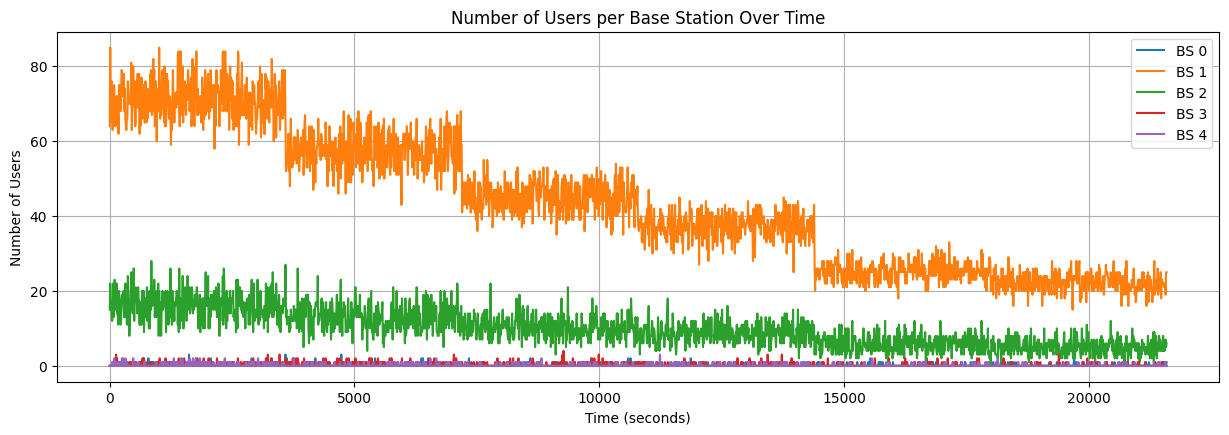

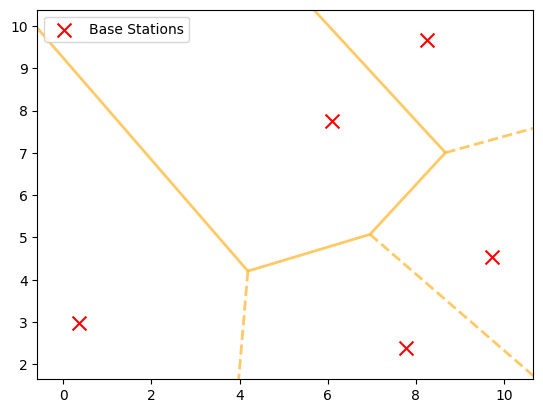

In [86]:
# Создаем экземпляр класса
load_dist = LoadProfileUserDistribution(
    load_profile_path='../test_env/load_profile_with_deviation.json',
    num_base_stations=5
)

# Создаем сеть
network = AdvancedHCPPNetwork(
    area_size=10,  # 1000 метров = 1 км
    num_base_stations=5,
    min_distance=1,  # 200 метров между станциями
    num_users=100
)

# Генерируем базовые станции
base_stations = network.generate_base_stations(fixed_seed=13)

# Маппинг station_idx -> domain_name
domain_mapping = {
    0: "bs1.example.com",
    1: "bs2.example.com",
    2: "bs3.example.com",
    3: "bs4.example.com",
    4: "bs5.example.com"
}

# Создаем профили нагрузки для каждой БС
for station_idx in range(network.num_base_stations):
    # Создаем список всех профилей нагрузки для текущей БС
    all_load_profiles = []
    
    # Для каждого временного шага
    for time_index in range(len(load_dist.load_profile)):
        # Получаем текущий и следующий timestamp
        current_timestamp = load_dist.load_profile[time_index]['timestamp']
        next_timestamp = load_dist.load_profile[time_index + 1]['timestamp'] if time_index < len(load_dist.load_profile) - 1 else current_timestamp + 1
        
        # Вычисляем интервал
        interval = next_timestamp - current_timestamp
        
        # Получаем распределение пользователей для текущего момента времени
        distribution, timestamp = load_dist.distribute_users(time_index, base_stations)
        
        # Добавляем профиль нагрузки для текущей секунды
        profile = {
            "concurrent_users": len(distribution[station_idx]),
            "request_interval": interval,
            "profile_duration": interval
        }
        all_load_profiles.append(profile)
    
    # Создаем профиль для БС со всеми временными шагами
    station_profile = {
        "id": f"bs_{station_idx}",
        "name": f"Base Station {station_idx}",
        "settings": {
            "host": domain_mapping[station_idx],
            "port": 8080,
            "load_profiles": all_load_profiles
        }
    }
    
    # Сохраняем в JSON для каждой БС
    with open(f'bs_{station_idx}_profile.json', 'w') as f:
        json.dump(station_profile, f, indent=4)

# Визуализация
plt.figure(figsize=(15, 10))

# 1. График количества пользователей во времени
plt.subplot(2, 1, 1)
timestamps = [step['timestamp'] for step in load_dist.load_profile]
for station_idx in range(network.num_base_stations):
    users_over_time = []
    for time_index in range(len(load_dist.load_profile)):
        distribution, _ = load_dist.distribute_users(time_index, base_stations)
        users_over_time.append(len(distribution[station_idx]))
    plt.plot(timestamps, users_over_time, label=f'BS {station_idx}')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Users')
plt.title('Number of Users per Base Station Over Time')
plt.legend()
plt.grid(True)

# Создаем диаграмму Вороного
vor = Voronoi(base_stations)
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=0)

# Отображаем базовые станции
plt.scatter(base_stations[:, 0], base_stations[:, 1], c='red', marker='x', s=100, label='Base Stations')

plt.legend()
plt.show()